### Uczenie maszynowe 
### Lab3 Regresja logistyczna

### Dawid Lisek gr. 2A

16.03.2022

Śr 14.00 - 15.30 

Importowanie pakietów:

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Ex. 0.: Please get yourself familiar with the data.


In [61]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [62]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


 Ex. 1.: Please follow the steps below:

    -add a column with values '1'
    -divide the data into parameters (X) and labels/classes (y)
    -data conversion to numpy ( np.array )


Normalizacja:

In [63]:
data.insert(0, 'ones', [1 for x in range(len(data))])

Dane po dodaniu kolumny 'ones' oraz normalizacji:

In [64]:
data.head()

,ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [65]:
X = data[['ones', 'Exam 1', 'Exam 2']]
y = data['Admitted']
X = np.array(X.values)
y = np.array(y.values)

Ex. 2.: Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

In [66]:
admitted_1 = data.loc[data['Admitted'] == 1]
admitted_0 = data.loc[data['Admitted'] == 0]

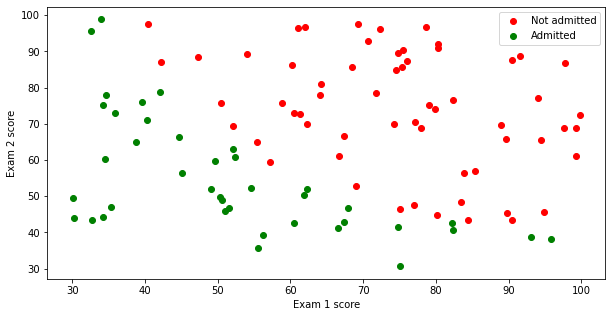

In [67]:
plt.figure(figsize=(10, 5))
plt.scatter(x=admitted_1['Exam 1'], y=admitted_1['Exam 2'], color='r', label='Not admitted')
plt.scatter(x=admitted_0['Exam 1'], y=admitted_0['Exam 2'], color='g', label='Admitted')
plt.legend(loc='best')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

Ex 3

In [68]:
def sig(t):
    return 1 / (1 + np.exp(-t))

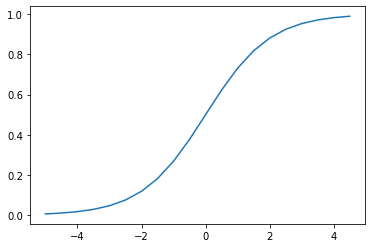

In [69]:
plt.figure()
plt.plot(np.arange(start=-5, stop = 5, step = 0.5), sig(np.arange(start=-5, stop = 5, step = 0.5)))
plt.show()

Ex 5

Normalizacja:

In [70]:
for col in data[['Exam 1', 'Exam 2']].columns:
    data[col] = (data[col] - data[col].mean()) / data[col].std()

X = data[['ones', 'Exam 1', 'Exam 2']]
y = data['Admitted']
X = np.array(X.values)
y = np.array(y.values)

In [71]:
theta = np.zeros(3)

In [72]:
def compute_cost(theta, X, y):
    m = len(y)
    h_theta = sig(theta @ X.T)
    cost = (-y @ np.log(h_theta) - (1 - y) @ np.log(1 - h_theta)) / m
    return cost

In [73]:
compute_cost(theta, X, y)

0.6931471805599452

Ex. 6.: Please implement simple gradient function:

In [74]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    theta = list(theta)
    for _ in range(it):
        m = len(X)
        h_theta = sig(theta @ X.T)
        for i in range(X.shape[1]):
            theta[i] = theta[i] - alpha * np.sum(((h_theta - y)) * X[:, i])/m
        cost.append(compute_cost(theta, X, y))
    return np.array(theta), cost

In [75]:
alpha = 1
it = 150
theta_opt, cost = simple_gradient(X, y, theta, alpha, it)

In [76]:
cost[-1]

0.20647054423182587

In [77]:
theta_opt

array([1.41682812, 3.36988187, 3.122184  ])

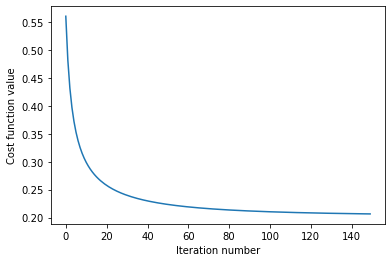

In [78]:
plt.figure()
plt.plot(np.arange(150), cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.show()

Ex. 7.: Please present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5.

In [79]:
p = (sig(np.dot(X, theta_opt)) >= 0.5).astype(int)
df_pred = data[['Admitted']]
df_pred.insert(1, 'Prediction', p)
df_pred

,Admitted,Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
95,1,1
96,1,1
97,1,1
98,1,0


In [80]:
accuracy = df_pred.loc[df_pred['Admitted'] == df_pred['Prediction']].shape[0] / df_pred.shape[0]
accuracy

0.89

### Logistic regression - Python

Ex. 1.: Get yourself familiar with the object sklearn.linear_model.LogisticRegression and choose appropriate optimalization algorithm, regularization coefficient and create a regression model.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [82]:
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

<ipython-input-89-c3423fd7ec04>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


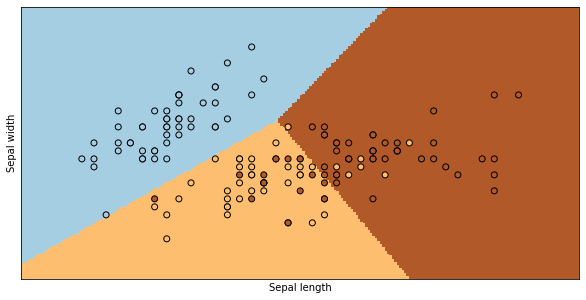

In [89]:
#Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

Ex. 3.: Using method predict_proba please predict the probability of being a member of a given class.

In [84]:
y_pred_proba = logreg.predict_proba(X)
y_pred_proba

array([[9.23473153e-01, 5.85080967e-02, 1.80187501e-02],
       [7.91565001e-01, 1.80912648e-01, 2.75223510e-02],
       [9.42364041e-01, 5.08634498e-02, 6.77250960e-03],
       [9.40553540e-01, 5.37594346e-02, 5.68702546e-03],
       [9.61853130e-01, 2.96143932e-02, 8.53247725e-03],
       [9.43195775e-01, 3.40879207e-02, 2.27163048e-02],
       [9.80228540e-01, 1.74171057e-02, 2.35435467e-03],
       [9.22927337e-01, 6.19217567e-02, 1.51509067e-02],
       [9.35998984e-01, 5.99949470e-02, 4.00606950e-03],
       [8.47181712e-01, 1.31165035e-01, 2.16532530e-02],
       [8.90214168e-01, 7.01091740e-02, 3.96766576e-02],
       [9.60793368e-01, 3.31735691e-02, 6.03306252e-03],
       [8.43554938e-01, 1.38305338e-01, 1.81397240e-02],
       [9.67965497e-01, 3.01509884e-02, 1.88351450e-03],
       [8.24095093e-01, 7.61837358e-02, 9.97211710e-02],
       [9.65419483e-01, 1.34828235e-02, 2.10976937e-02],
       [9.43195775e-01, 3.40879207e-02, 2.27163048e-02],
       [9.23473153e-01, 5.85080

In [98]:
df = pd.DataFrame(data=y_pred_proba, columns=['prob1', 'prob2', 'prob3'])
df.insert(3, 'y_true', Y)
df

,prob1,prob2,prob3,y_true
0,0.923473,0.058508,0.018019,0
1,0.791565,0.180913,0.027522,0
2,0.942364,0.050863,0.006773,0
3,0.940554,0.053759,0.005687,0
4,0.961853,0.029614,0.008532,0
...,...,...,...,...
145,0.003452,0.311697,0.684851,2
146,0.003292,0.551668,0.445041,2
147,0.008108,0.376700,0.615192,2
148,0.101487,0.366577,0.531936,2


Ex. 4.: Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2)

In [85]:
logreg.score(X, Y)

0.82

In [87]:
mean_squared_error(Y, logreg.predict(X))

0.18

In [88]:
accuracy_score(Y, logreg.predict(X))

0.82